## Context
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

### Content
It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

### Acknowledgements
The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

### Inspiration
To detect severity from tweets. You may have a look at this.

In [0]:
import pandas as pd
import numpy as np
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/training.csv', encoding='latin1', header=None)
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [0]:
df = pd.DataFrame(df).rename(columns={0:'target', 1:'id', 2:'date', 3:'flag', 4:'user', 5:'text'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [0]:
df.target = df.target.apply(lambda x:int((x/2)/2))

In [7]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [0]:
df_mod = df[['target', 'text']]

In [9]:
df_mod['text'] = df_mod['text'].apply(lambda x: x.lower())
df_mod['text'] = df_mod['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
SAMPLE_SIZE = 300000

In [0]:
df_mod = df_mod.sample(SAMPLE_SIZE, random_state=101)

In [0]:
from sklearn.model_selection import train_test_split

In [13]:
TRAIN_SIZE = .7
X_train, X_test, y_train, y_test = train_test_split(df_mod['text'], df_mod['target'], train_size = TRAIN_SIZE, random_state = 101)
print(f'train size: {len(X_train)}')
print(f'test size: {len(X_test)}')

train size: 210000
test size: 90000


# Config

In [0]:
vocab_size = 10000
embedding_dim = 128
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
num_epochs = 20

# Word -> Vector

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [0]:
tokenizer.fit_on_texts(list(X_train))

In [18]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'my': 6,
 'and': 7,
 'you': 8,
 'is': 9,
 'it': 10,
 'for': 11,
 'in': 12,
 'of': 13,
 'im': 14,
 'on': 15,
 'me': 16,
 'so': 17,
 'have': 18,
 'that': 19,
 'but': 20,
 'just': 21,
 'with': 22,
 'at': 23,
 'be': 24,
 'its': 25,
 'not': 26,
 'was': 27,
 'this': 28,
 'now': 29,
 'good': 30,
 'up': 31,
 'day': 32,
 'all': 33,
 'get': 34,
 'out': 35,
 'like': 36,
 'are': 37,
 'no': 38,
 'go': 39,
 'dont': 40,
 'today': 41,
 'going': 42,
 'your': 43,
 'do': 44,
 'love': 45,
 'work': 46,
 'too': 47,
 'cant': 48,
 'got': 49,
 'time': 50,
 'back': 51,
 'from': 52,
 'lol': 53,
 'u': 54,
 'one': 55,
 'what': 56,
 'will': 57,
 'we': 58,
 'about': 59,
 'know': 60,
 'am': 61,
 'really': 62,
 'had': 63,
 'see': 64,
 'can': 65,
 'some': 66,
 'well': 67,
 'if': 68,
 'still': 69,
 'new': 70,
 'want': 71,
 'night': 72,
 'think': 73,
 'how': 74,
 'amp': 75,
 'thanks': 76,
 'home': 77,
 'when': 78,
 'as': 79,
 'there': 80,
 'oh': 81,
 '2': 82,
 'miss': 

In [0]:
training_sequences = tokenizer.texts_to_sequences((X_train))
testing_sequences = tokenizer.texts_to_sequences((X_test))

In [0]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                               padding = padding_type, truncating=trunc_type)

testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding = padding_type, truncating=trunc_type)

# Modeling (Single LSTM)

In [21]:
import tensorflow as tf
import keras.callbacks

Using TensorFlow backend.


In [22]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=.2)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,609,217
Trainable params: 1,609,217
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(np.asarray(training_padded).shape)
print(np.asarray(y_train).shape)
print(np.asarray(testing_padded).shape)
print(np.asarray(y_test).shape)

(210000, 200)
(210000,)
(90000, 200)
(90000,)


In [0]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto') 

In [25]:
history1 = model1.fit(np.asarray(training_padded), np.asarray(y_train), 
                    epochs=num_epochs, 
                    validation_split=.3, 
                    verbose=1, 
                    callbacks=[checkpoint])

Epoch 1/20
4594/4594 [==============================] - ETA: 0s - loss: 0.4705 - acc: 0.7769
Epoch 00001: val_acc improved from -inf to 0.79489, saving model to model-001-0.776898-0.794889.h5
4594/4594 [==============================] - 194s 42ms/step - loss: 0.4705 - acc: 0.7769 - val_loss: 0.4373 - val_acc: 0.7949
Epoch 2/20
4594/4594 [==============================] - ETA: 0s - loss: 0.4040 - acc: 0.8144
Epoch 00002: val_acc improved from 0.79489 to 0.80203, saving model to model-002-0.814442-0.802032.h5
4594/4594 [==============================] - 193s 42ms/step - loss: 0.4040 - acc: 0.8144 - val_loss: 0.4298 - val_acc: 0.8020
Epoch 3/20
4594/4594 [==============================] - ETA: 0s - loss: 0.3671 - acc: 0.8340
Epoch 00003: val_acc did not improve from 0.80203
4594/4594 [==============================] - 194s 42ms/step - loss: 0.3671 - acc: 0.8340 - val_loss: 0.4381 - val_acc: 0.7970
Epoch 4/20
4594/4594 [==============================] - ETA: 0s - loss: 0.3329 - acc: 0.8521

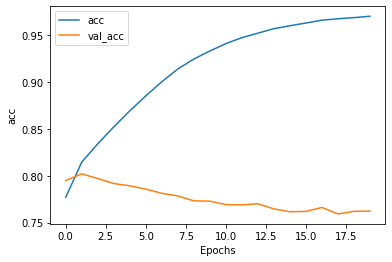

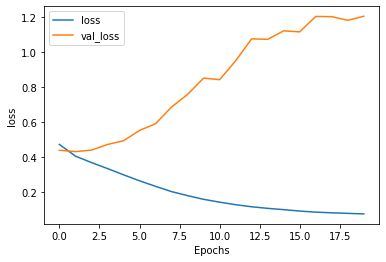

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history1.history[string])
  plt.plot(history1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")

# Optional1: Embedding Neural Network

In [27]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dropout(.3), 
    tf.keras.layers.Dense(256, activation = 'relu'), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['acc'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 1,313,281
Trainable params: 1,313,281
Non-trainable params: 0
_________________________________________________________________


In [28]:
history2 = model2.fit(np.asarray(training_padded), np.asarray(y_train), 
                    epochs=num_epochs, 
                    validation_split=.3, 
                    verbose=1)

Epoch 1/20
4594/4594 [==============================] - 69s 15ms/step - loss: 0.5264 - acc: 0.7333 - val_loss: 0.4686 - val_acc: 0.7781
Epoch 2/20
4594/4594 [==============================] - 70s 15ms/step - loss: 0.4554 - acc: 0.7868 - val_loss: 0.4566 - val_acc: 0.7851
Epoch 3/20
4594/4594 [==============================] - 70s 15ms/step - loss: 0.4374 - acc: 0.7948 - val_loss: 0.5076 - val_acc: 0.7480
Epoch 4/20
4594/4594 [==============================] - 73s 16ms/step - loss: 0.4280 - acc: 0.7995 - val_loss: 0.4555 - val_acc: 0.7867
Epoch 5/20
4594/4594 [==============================] - 73s 16ms/step - loss: 0.4197 - acc: 0.8033 - val_loss: 0.4661 - val_acc: 0.7818
Epoch 6/20
4594/4594 [==============================] - 72s 16ms/step - loss: 0.4135 - acc: 0.8059 - val_loss: 0.4779 - val_acc: 0.7756
Epoch 7/20
4594/4594 [==============================] - 72s 16ms/step - loss: 0.4074 - acc: 0.8107 - val_loss: 0.4651 - val_acc: 0.7856
Epoch 8/20
4594/4594 [==========================

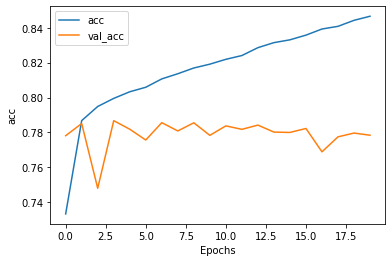

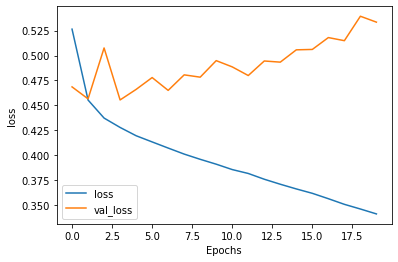

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history2, "acc")
plot_graphs(history2, "loss")

# Optional2: 1D Convolutional

In [30]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          82048     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 1,395,329
Trainable params: 1,395,329
Non-trainable params: 0
_________________________________________________________________


In [31]:
history3 = model3.fit(np.asarray(training_padded), np.asarray(y_train), 
                    epochs=num_epochs, 
                    validation_split=.3, 
                    verbose=1)

Epoch 1/20
4594/4594 [==============================] - 74s 16ms/step - loss: 0.4792 - acc: 0.7681 - val_loss: 0.4480 - val_acc: 0.7902
Epoch 2/20
4594/4594 [==============================] - 74s 16ms/step - loss: 0.4127 - acc: 0.8106 - val_loss: 0.4373 - val_acc: 0.7954
Epoch 3/20
4594/4594 [==============================] - 74s 16ms/step - loss: 0.3731 - acc: 0.8323 - val_loss: 0.4510 - val_acc: 0.7946
Epoch 4/20
4594/4594 [==============================] - 74s 16ms/step - loss: 0.3330 - acc: 0.8537 - val_loss: 0.4692 - val_acc: 0.7882
Epoch 5/20
4594/4594 [==============================] - 73s 16ms/step - loss: 0.2920 - acc: 0.8737 - val_loss: 0.5296 - val_acc: 0.7848
Epoch 6/20
4594/4594 [==============================] - 73s 16ms/step - loss: 0.2531 - acc: 0.8912 - val_loss: 0.5988 - val_acc: 0.7716
Epoch 7/20
4594/4594 [==============================] - 72s 16ms/step - loss: 0.2184 - acc: 0.9069 - val_loss: 0.7175 - val_acc: 0.7734
Epoch 8/20
4594/4594 [==========================

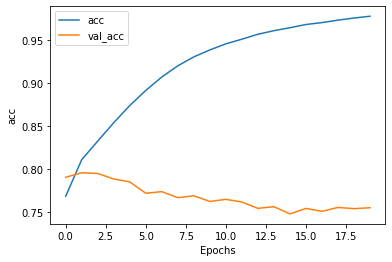

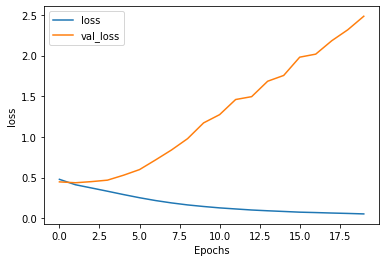

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history3.history[string])
  plt.plot(history3.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history3, "acc")
plot_graphs(history3, "loss")

# Optional3: GRUs

In [33]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 1,387,777
Trainable params: 1,387,777
Non-trainable params: 0
_________________________________________________________________


In [34]:
history4 = model4.fit(np.asarray(training_padded), np.asarray(y_train), 
                    epochs=num_epochs, 
                    validation_split=.3, 
                    verbose=1)

Epoch 1/20
4594/4594 [==============================] - 141s 31ms/step - loss: 0.4668 - acc: 0.7765 - val_loss: 0.4352 - val_acc: 0.7971
Epoch 2/20
4594/4594 [==============================] - 141s 31ms/step - loss: 0.3972 - acc: 0.8189 - val_loss: 0.4433 - val_acc: 0.7984
Epoch 3/20
4594/4594 [==============================] - 141s 31ms/step - loss: 0.3564 - acc: 0.8397 - val_loss: 0.4403 - val_acc: 0.7984
Epoch 4/20
4594/4594 [==============================] - 142s 31ms/step - loss: 0.3157 - acc: 0.8590 - val_loss: 0.4894 - val_acc: 0.7924
Epoch 5/20
4594/4594 [==============================] - 142s 31ms/step - loss: 0.2710 - acc: 0.8804 - val_loss: 0.5353 - val_acc: 0.7847
Epoch 6/20
4594/4594 [==============================] - 141s 31ms/step - loss: 0.2276 - acc: 0.9003 - val_loss: 0.6383 - val_acc: 0.7800
Epoch 7/20
4594/4594 [==============================] - 140s 31ms/step - loss: 0.1874 - acc: 0.9185 - val_loss: 0.7213 - val_acc: 0.7735
Epoch 8/20
4594/4594 [===================

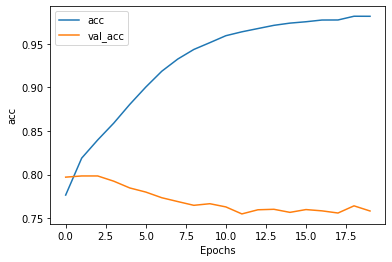

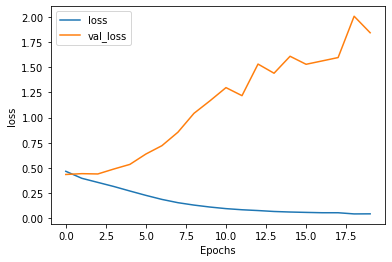

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history4.history[string])
  plt.plot(history4.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history4, "acc")
plot_graphs(history4, "loss")

#Predicting (From LSTM)

In [36]:
scores = model1.predict(testing_padded, verbose=1)

2813/2813 [==============================] - 30s 11ms/step


In [0]:
y_pred=np.where(scores>0.5,1,0)

In [38]:
y_pred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [0]:
from sklearn import metrics

In [40]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     44917
           1       0.76      0.77      0.76     45083

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



# Best Model Accuracy

In [43]:
best_model = tf.keras.models.load_model('/content/drive/My Drive/models/model-002-0.814442-0.802032.h5') #LSTM 2nd epochs
y_best = best_model.predict(testing_padded, verbose=1)
y_best=np.where(y_best>0.5,1,0)
print('\n', metrics.confusion_matrix(y_best, y_test))
print('-'*100)
print(metrics.classification_report(y_best,y_test))

2813/2813 [==============================] - 30s 11ms/step

 [[36127  9215]
 [ 8630 36028]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.80     45342
           1       0.80      0.81      0.80     44658

    accuracy                           0.80     90000
   macro avg       0.80      0.80      0.80     90000
weighted avg       0.80      0.80      0.80     90000

